## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

In [ ]:
# IN PROCESS...

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement


World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications

Now, we want to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts that I get from Kaggle. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

<a name='1.2'></a>
## 1.2 Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<a name='1.3'></a>
## 1.3 Read or Import

In [2]:
df = pd.read_csv("framingham.csv")

<a name='1.4'></a>
## 1.4 Data Summary

As we can see we have 15 variables in total, 14 independent or feature variables and 1 dependent or response variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


All of the features are numerical

There are 6 variables that have binary value including the response variable and 10 variables that have continuous value

In [20]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 16 numerical features:
 ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [21]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 0 categorical features:
 []


<a name='1.5'></a>
## 1.5 Data Preparation

In [23]:
# Split the train and test data
dftrain, dftest = train_test_split(df, 
                                   random_state=None,  
                                   test_size=0.20,  
                                   shuffle=True)

# Seperate features and target variable
X_train = dftrain.drop(['TenYearCHD'], axis=1)
y_train = dftrain.TenYearCHD
X_test = dftest.drop(['TenYearCHD'], axis=1)
y_test = dftest.TenYearCHD

In [27]:
#80/20 split
print(f'X_train: {X_train.shape} ({round(len(X_train)/len(df), 1) * 100}%)')
print(f'y_train: {y_train.shape} ({round(len(y_train)/len(df), 1) * 100}%)')
print(f'X_test: {X_test.shape} ({round(len(X_test)/len(df), 1) * 100}%)')
print(f'y_test: {y_test.shape} ({round(len(y_test)/len(df), 1) * 100}%)')

#Data preview
print('')
print('')
print('X_train: ')
print(X_train.head(3))
print('')
print('y_train: ')
print(y_train.head(3))

X_train: (3390, 15) (80.0%)
y_train: (3390,) (80.0%)
X_test: (848, 15) (20.0%)
y_test: (848,) (20.0%)


X_train: 
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
898      0   62        2.0              1         6.0     0.0   
1556     0   43        2.0              0         0.0     0.0   
439      1   63        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
898                 0             1         0    244.0  168.0  102.0  26.39   
1556                0             0         0    213.0   96.0   62.0  19.38   
439                 0             0         0    237.0  113.0   80.0  27.61   

      heartRate  glucose  
898        76.0    105.0  
1556       74.0     80.0  
439        90.0     71.0  

y_train: 
898     1
1556    0
439     0
Name: TenYearCHD, dtype: int64


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

<Figure size 576x432 with 0 Axes>

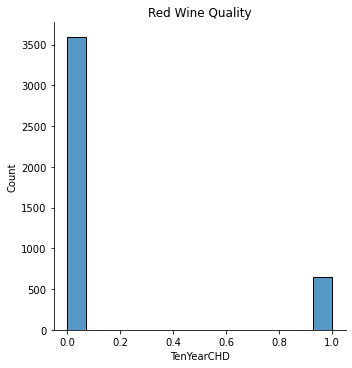

In [31]:
plt.figure(figsize=(8,6))
y = df.TenYearCHD
sns.displot(y)
title = plt.title("Red Wine Quality")

#As we can see the distribution gathered in the middle
#5 Quality value shows as the most quality value in red wine distribution followed by 6

<a name='2.2'></a>
## 2.2 Features Correlation with Target

In [34]:
# Top 10 highest pearson correlation
corr_mat = df.corr().TenYearCHD.sort_values(ascending=False)
corr_mat.head(12)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
Name: TenYearCHD, dtype: float64

Seems like the age has highest correlation followed with sysBP, and prevalentHyp. The prevalentStroke and BMI variables have the lowest correlation value

<a name='2.3'></a>
## 2.3 Feature Variables

<a name='2.3.1'></a>
### 2.3.1 Age

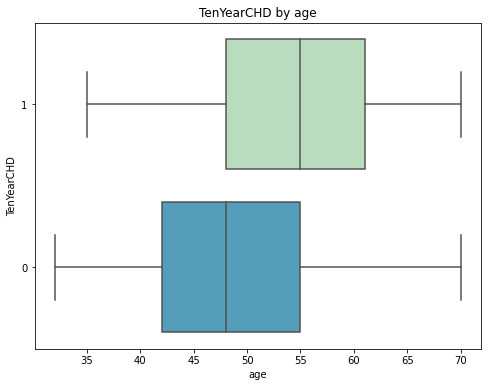

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='TenYearCHD', data=dftrain, orient='h', order=[1, 0], palette='GnBu')
title = plt.title('TenYearCHD by age')

# It seems like the TenYearCHD typically occured in older people. The median is around 55

<a name='2.3.2'></a>
### 2.3.2 sysBP

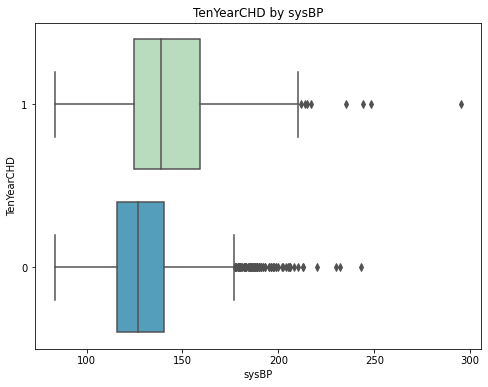

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sysBP', y='TenYearCHD', data=dftrain, orient='h', order=[1, 0], palette='GnBu')
title = plt.title('TenYearCHD by sysBP')
# As we can see

<a name='2.3.3'></a>
### 2.3.3 prevalentHyp

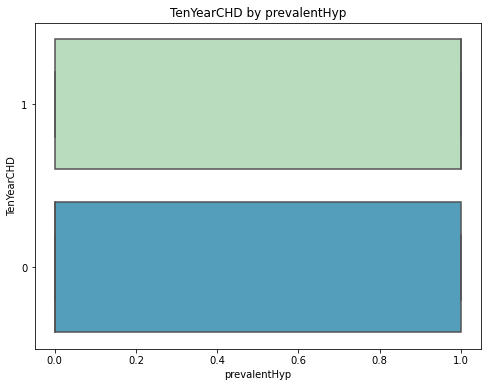

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='prevalentHyp', y='TenYearCHD', data=dftrain, orient='h', order=[1, 0], palette='GnBu')
title = plt.title('TenYearCHD by prevalentHyp')
# As we can see

<a name='2.3.4'></a>
### 2.3.4 prevalentStroke

<a name='2.3.5'></a>
### 2.3.5 BMI

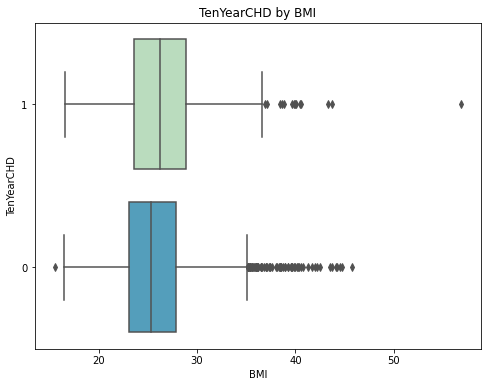

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI', y='TenYearCHD', data=dftrain, orient='h', order=[1, 0], palette='GnBu')
title = plt.title('TenYearCHD by BMI')
# As we can see there is just a small different in the median and the quartal. The data still shows us there is a correlation but small

<a name='2.4'></a>
## 2.4 Multicollinearity

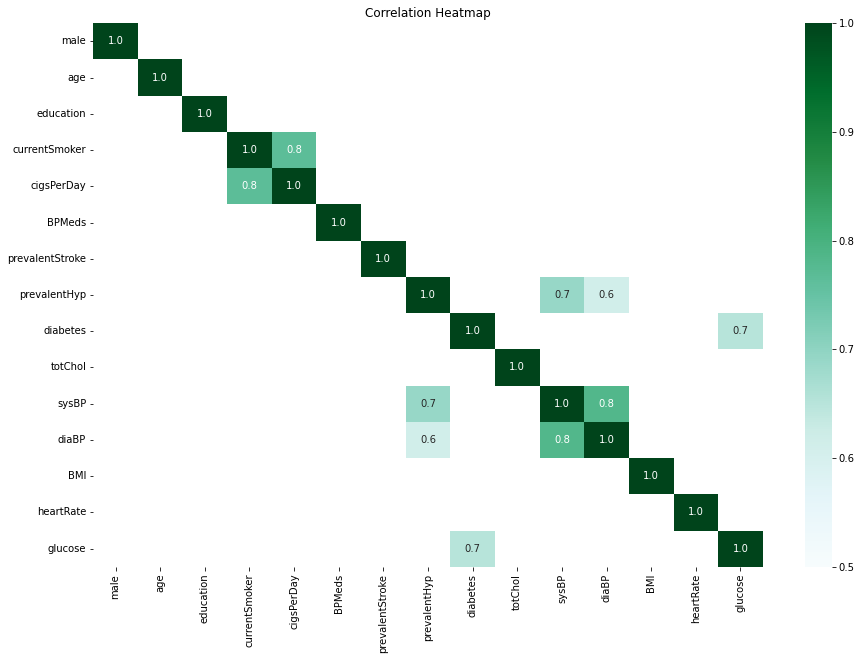

In [52]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = dftrain.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='BuGn',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

<a name='3'></a>
# 3. Feature Engineering

<a name='3.1'></a>
## 3.1 Missing Values

In [54]:
missing_data_train_count = X_train.isnull().sum()
missing_data_train_percent = X_train.isnull().sum() / len(X_train) * 100

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 6 features having missing data.

Top 10 missing value features:


,Count,Percent
glucose,311,9.174041
education,82,2.418879
totChol,45,1.327434
BPMeds,41,1.209440
cigsPerDay,22,0.648968
BMI,15,0.442478


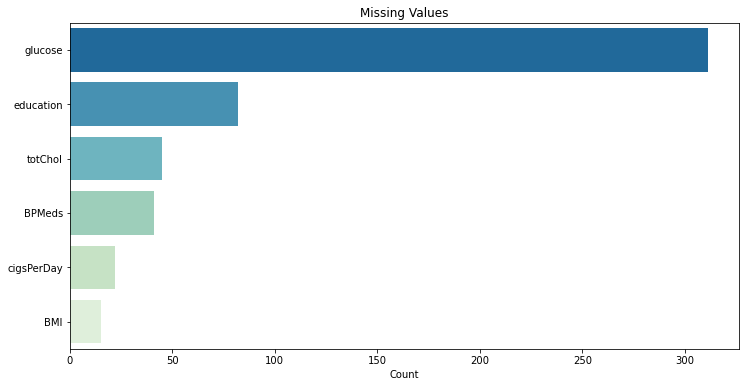

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data_train.head(18).index,
            x=missing_data_train.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

In [57]:
missing_data_test_count = X_test.isnull().sum()
missing_data_test_percent = X_test.isnull().sum() / len(X_test) * 100

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 7 features having missing data.

Top 10 missing value features:


,Count,Percent
glucose,77,9.080189
education,23,2.712264
BPMeds,12,1.415094
cigsPerDay,7,0.825472
totChol,5,0.589623
BMI,4,0.471698
heartRate,1,0.117925


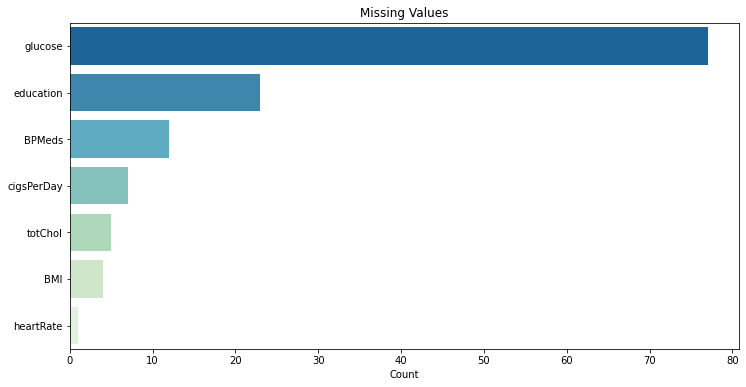

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data_test.head(18).index,
            x=missing_data_test.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

In [ ]:
# Fill continuous and discrete (exclude 'Lot Frontage') variables with 0
# Fill 'Lot Frontage' variable with its mean value
# Fill 'Garage Yr Blt' with 'Year Built'
variables_train = [
    'Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

X_train[variables_train] = X_t

rain[variables_train].fillna(0)

X_train['Lot Frontage'] = X_train['Lot Frontage'].fillna(X_train['Lot Frontage'].mean())
X_train['Garage Yr Blt'] = X_train['Garage Yr Blt'].fillna(X_train['Year Built'])

In [ ]:
X_test['Mas Vnr Area'] = X_test['Mas Vnr Area'].fillna(0)

X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_test['Lot Frontage'].mean())
X_test['Garage Yr Blt'] = X_test['Garage Yr Blt'].fillna(X_test['Year Built'])

In [ ]:
#Delete Outliers

<a name='4'></a>
# 4. Model

<a name='4.1'></a>
## 4.1 Binomial Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (Train):",accuracy_score(y_train,Y_train_pred))
print("Confusion Matrix (Train) \n",confusion_matrix(y_test,Y_test_pred))
print("Accuracy Score (Test):",accuracy_score(y_test,Y_test_pred))
print("Confusion Matrix (Test) \n",confusion_matrix(y_test,Y_test_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<a name='4.2'></a>
## 4.2 Neural Networks

In [61]:
y_train.shape

(3390,)

In [62]:
type(y_train)

pandas.core.series.Series

In [63]:
X_train.shape

(3390, 15)

In [64]:
y_train

898     1
1556    0
439     0
2292    0
2681    0
       ..
154     0
1756    0
1010    0
406     0
2286    0
Name: TenYearCHD, Length: 3390, dtype: int64